<h1 align="center"><font size="5">Classification with Python</font></h1>

<h1 align="center"><font size="3">Munish Kumar</font></h1>
This is looking at different classification algorithms, and determing which algorithm gives the best accuracy. 2 data sets are used, loan_train and loan_test.

Load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since itâ€™s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000     30       9/9/2016   
4           6             6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male

In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [10]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  
3 2016-10-08   28               college  female  
4 2016-10-08   29               college    male

# Data visualization and pre-processing



Number of each class is in our data set 

In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Plot some data to better understand:

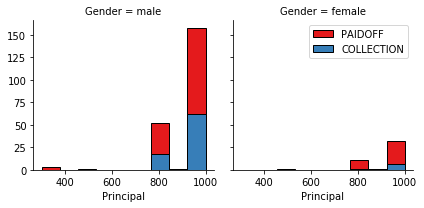

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

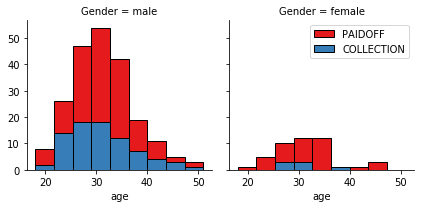

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

Day of the week people get the loan 

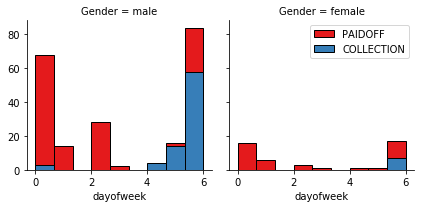

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


People who get the loan at the end of the week dont pay it off; will use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below    male          3        0  
1 2016-10-07   33              Bechalor  female          3        0  
2 2016-09-22   27               college    male          3        0  
3 2016-10-08   28               college  female          4        1  
4 2016-10-08   29               college    male          4        1

## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below       0          3        0  
1 2016-10-07   33              Bechalor       1          3        0  
2 2016-09-22   27               college       0          3        0  
3 2016-10-08   28               college       1          4        1  
4 2016-10-08   29               college       0          4        1

## One Hot Encoding

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

Principal  terms  age  Gender             education
0       1000     30   45       0  High School or Below
1       1000     30   33       1              Bechalor
2       1000     15   27       0               college
3       1000     30   28       1               college
4       1000     30   29       0               college

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

### Label Data for Machine Learning

In [19]:
y = df['loan_status'].values
y[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Will highligh the following 4 algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)
Main issue here is knowing what the best 'k' to use is. Will loop through a series of k values, and plot accuracy to find the best result

In [50]:
#Train test split
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 365
)

(346, 8) (346,)


The dataset is split into 80% training and 20% testing; random state is fixed so that the initial split stays the same

In [51]:
print('Train Set:', X_train.shape, y_train.shape)
print('Test Set:', X_test.shape, y_test.shape)

Train Set: (276, 8) (276,)
Test Set: (70, 8) (70,)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, jaccard_similarity_score, log_loss 
from sklearn.metrics import classification_report, confusion_matrix, f1_score

K = 10

mean_acc = np.zeros((K-1))
jac_sim_score = np.zeros((K-1))
fscore = np.zeros((K-1))
conf_mat = np.zeros((K-1))

std_acc = np.zeros((K-1))
Confusemat = []

for i in range(1,K):
    # Train the model
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    
    #Score Predictors
    mean_acc[i-1] = accuracy_score(y_test, yhat)
    jac_sim_score[i-1] = jaccard_similarity_score(y_test, yhat)
    conf_mat[i-1] = confusion_matrix(y_test, yhat, labels=['PAIDOFF'])
    fscore[i-1] = f1_score(y_test, yhat, average='weighted')
    
    # np.std(yhat == y_test):
    # A comparison of two numpy arrays returns a boolean array. 
    # Booleans values are converted into 1(True) and 0 (false) intrinsically
    # / np.sqrt(yhat.shape[0])
    # taking the std of boolean array & dividing that by the 
    # square root length of that array.
    std_acc[i-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

print('Mean Accuracy:', mean_acc)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score)
print('\n')
print('F1 Score:', fscore)
print('\n')
#print('Log Loss:', lloss)
print('F1 Score:\n',classification_report(y_test, yhat))

Mean Accuracy: [0.68571429 0.61428571 0.71428571 0.65714286 0.72857143 0.75714286
 0.77142857 0.72857143 0.71428571]


Jaccard Similarity Score: [0.68571429 0.61428571 0.71428571 0.65714286 0.72857143 0.75714286
 0.77142857 0.72857143 0.71428571]


F1 Score: [0.67809524 0.64360902 0.70735931 0.66959707 0.70944421 0.75433983
 0.75106998 0.73632653 0.68883748]


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.30      0.19      0.23        16
     PAIDOFF       0.78      0.87      0.82        54

   micro avg       0.71      0.71      0.71        70
   macro avg       0.54      0.53      0.53        70
weighted avg       0.67      0.71      0.69        70



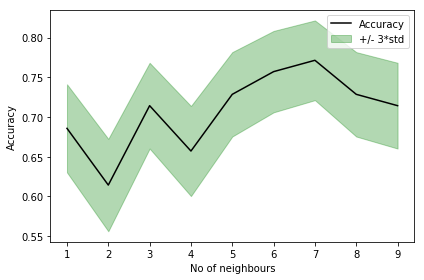

In [53]:
plt.plot(range(1,K), mean_acc, 'black')
plt.fill_between(range(1,K), 
                 mean_acc - 1*std_acc, 
                 mean_acc + 1*std_acc,
                 alpha = 0.3,
                 color = 'green')
plt.legend(('Accuracy', '+/- 3*std'))
plt.ylabel('Accuracy')
plt.xlabel('No of neighbours')
plt.tight_layout()
plt.show()

Ideal number of k is 7 for max accuracy 

In [98]:
neigh = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
yhat = neigh.predict(X_test)

mean_acc_KNN = accuracy_score(y_test, yhat)
jac_sim_score_KNN = jaccard_similarity_score(y_test, yhat)
conf_mat_KNN = confusion_matrix(y_test, yhat, labels=['PAIDOFF'])
fscore_KNN = f1_score(y_test, yhat, average='weighted')

print('Mean Accuracy:', mean_acc_KNN)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_KNN)
print('\n')
print('F1 Score:', fscore_KNN)
print('\n')
print('F1 Score:\n',classification_report(y_test, yhat))

Mean Accuracy: 0.7714285714285715


Jaccard Similarity Score: 0.7714285714285715


F1 Score: 0.75106998264893


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.50      0.31      0.38        16
     PAIDOFF       0.82      0.91      0.86        54

   micro avg       0.77      0.77      0.77        70
   macro avg       0.66      0.61      0.62        70
weighted avg       0.74      0.77      0.75        70



# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

loan_tree = DecisionTreeClassifier(criterion = 'entropy')
loan_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
loan_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
predtree = loan_tree.predict(X_test)
print(predtree[0:5])
print(y_test[0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [58]:
mean_acc_loan_tree = accuracy_score(y_test, predtree)
jac_sim_score_loan_tree = jaccard_similarity_score(y_test, predtree)
conf_mat_loan_tree = confusion_matrix(y_test, predtree, labels=['PAIDOFF'])
fscore_loan_tree = f1_score(y_test, predtree, average='weighted')

print('Mean Accuracy:', mean_acc_loan_tree)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_loan_tree)
print('\n')
print('F1 Score:', fscore_loan_tree)
print('\n')
#print('Log Loss:', lloss)
#print('\n')
print('F1 Score:\n',classification_report(y_test, predtree))

Mean Accuracy: 0.6571428571428571


Jaccard Similarity Score: 0.6571428571428571


F1 Score: 0.6639923894085935


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.28      0.31      0.29        16
     PAIDOFF       0.79      0.76      0.77        54

   micro avg       0.66      0.66      0.66        70
   macro avg       0.53      0.54      0.53        70
weighted avg       0.67      0.66      0.66        70



# Support Vector Machine

In [38]:
from sklearn import svm

In [41]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
yhat_SVM = clf.predict(X_test)
yhat_SVM[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [59]:
mean_acc_yhat_SWM = accuracy_score(y_test, yhat_SVM)
jac_sim_score_yhat_SWM = jaccard_similarity_score(y_test, yhat_SVM)
conf_mat_yhat_SWM = confusion_matrix(y_test, yhat_SVM, labels=['PAIDOFF'])
fscore_yhat_SWM = f1_score(y_test, yhat_SVM, average='weighted')


print('Mean Accuracy:', mean_acc_yhat_SWM)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_yhat_SWM)
print('\n')
print('F1 Score:', fscore_yhat_SWM)
print('\n')
#print('Log Loss:', lloss)
#print('\n')
print('F1 Score:\n', classification_report(y_test, yhat_SVM))

Mean Accuracy: 0.7428571428571429


Jaccard Similarity Score: 0.7428571428571429


F1 Score: 0.7290816326530614


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.42      0.31      0.36        16
     PAIDOFF       0.81      0.87      0.84        54

   micro avg       0.74      0.74      0.74        70
   macro avg       0.61      0.59      0.60        70
weighted avg       0.72      0.74      0.73        70



# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.01, solver = 'liblinear')
LR.fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
yhat_LR = LR.predict(X_test)
yhat_LR[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [73]:
mean_acc_yhat_LR = accuracy_score(y_test, yhat_LR)
jac_sim_score_yhat_LR = jaccard_similarity_score(y_test, yhat_LR)
conf_mat_yhat_LR = confusion_matrix(y_test, yhat_LR, labels=['PAIDOFF'])
fscore_yhat_LR = f1_score(y_test, yhat_LR, average='weighted')

yhat_LR_prob = LR.predict_proba(X_test)
lloss_yhat_LR = log_loss(y_test, yhat_LR_prob)


print('Mean Accuracy:', mean_acc_yhat_LR)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_yhat_LR)
print('\n')
print('F1 Score:', fscore_yhat_LR)
print('\n')
print('Log Loss:', lloss_yhat_LR)
print('\n')
print('F1 Score:\n', classification_report(y_test, yhat_LR))

Mean Accuracy: 0.7


Jaccard Similarity Score: 0.7


F1 Score: 0.6885368126747439


Log Loss: 0.5631977553372771


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.31      0.25      0.28        16
     PAIDOFF       0.79      0.83      0.81        54

   micro avg       0.70      0.70      0.70        70
   macro avg       0.55      0.54      0.54        70
weighted avg       0.68      0.70      0.69        70



# Model Evaluation using Test set

### Load Test set for evaluation 

In [115]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30       9/8/2016   
1           5             5     PAIDOFF        300      7       9/9/2016   
2          21            21     PAIDOFF       1000     30      9/10/2016   
3          24            24     PAIDOFF       1000     30      9/10/2016   
4          35            35     PAIDOFF        800     15      9/11/2016   

    due_date  age             education  Gender  
0  10/7/2016   50              Bechalor  female  
1  9/15/2016   35       Master or Above    male  
2  10/9/2016   43  High School or Below  female  
3  10/9/2016   26               college    male  
4  9/25/2016   29              Bechalor    male

Data preprocessing 

In [116]:
y_final = test_df['loan_status'].values
print(y_final[0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [117]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30     2016-09-08   
1           5             5     PAIDOFF        300      7     2016-09-09   
2          21            21     PAIDOFF       1000     30     2016-09-10   
3          24            24     PAIDOFF       1000     30     2016-09-10   
4          35            35     PAIDOFF        800     15     2016-09-11   

    due_date  age             education  Gender  
0 2016-10-07   50              Bechalor  female  
1 2016-09-15   35       Master or Above    male  
2 2016-10-09   43  High School or Below  female  
3 2016-10-09   26               college    male  
4 2016-09-25   29              Bechalor    male

In [118]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30     2016-09-08   
1           5             5     PAIDOFF        300      7     2016-09-09   
2          21            21     PAIDOFF       1000     30     2016-09-10   
3          24            24     PAIDOFF       1000     30     2016-09-10   
4          35            35     PAIDOFF        800     15     2016-09-11   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   50              Bechalor       1          3        0  
1 2016-09-15   35       Master or Above       0          4        1  
2 2016-10-09   43  High School or Below       1          5        1  
3 2016-10-09   26               college       0          5        1  
4 2016-09-25   29              Bechalor       0          6        1

Feature Selection

In [119]:
Feature_Final = test_df[['Principal','terms','age','Gender','weekend']]
Feature_Final = pd.concat([Feature_Final,pd.get_dummies(test_df['education'])], axis=1)
Feature_Final.drop(['Master or Above'], axis = 1,inplace=True)
Feature_Final.head()

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   50       1        0         1                     0   
1        300      7   35       0        1         0                     0   
2       1000     30   43       1        1         0                     1   
3       1000     30   26       0        1         0                     0   
4        800     15   29       0        1         1                     0   

   college  
0        0  
1        0  
2        0  
3        1  
4        0

In [120]:
Xtest_df = Feature_Final
Xtest_df = preprocessing.StandardScaler().fit(Xtest_df).transform(Xtest_df)
Xtest_df[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [121]:
# K Nearest Neighbor(KNN)
yhat_test_KNN = neigh.predict(Xtest_df)

mean_acc_KNN = accuracy_score(y_final, yhat_test_KNN)
jac_sim_score_KNN = jaccard_similarity_score(y_final, yhat_test_KNN)
conf_mat_KNN = confusion_matrix(y_final, yhat_test_KNN, labels=['PAIDOFF'])
fscore_KNN = f1_score(y_final, yhat_test_KNN, average='weighted')


print('Mean Accuracy:', mean_acc_KNN)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_KNN)
print('\n')
print('F1 Score:', fscore_KNN)
print('\n')
print('F1 Score:\n', classification_report(y_final, yhat_test_KNN))

Mean Accuracy: 0.7037037037037037


Jaccard Similarity Score: 0.7037037037037037


F1 Score: 0.6579124579124579


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.33      0.14      0.20        14
     PAIDOFF       0.75      0.90      0.82        40

   micro avg       0.70      0.70      0.70        54
   macro avg       0.54      0.52      0.51        54
weighted avg       0.64      0.70      0.66        54



In [122]:
# Decision Tree
yhat_tree = loan_tree.predict(Xtest_df)

mean_acc_tree = accuracy_score(y_final, yhat_tree)
jac_sim_score_tree = jaccard_similarity_score(y_final, yhat_tree)
conf_mat_tree = confusion_matrix(y_final, yhat_tree, labels=['PAIDOFF'])
fscore_tree = f1_score(y_final, yhat_tree, average='weighted')

print('Mean Accuracy:', mean_acc_tree)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_tree)
print('\n')
print('F1 Score:', fscore_tree)
print('\n')
print('F1 Score:\n', classification_report(y_final, yhat_tree))

Mean Accuracy: 0.7407407407407407


Jaccard Similarity Score: 0.7407407407407407


F1 Score: 0.7407407407407407


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.50      0.50      0.50        14
     PAIDOFF       0.82      0.82      0.82        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.66      0.66      0.66        54
weighted avg       0.74      0.74      0.74        54



In [123]:
# Support Vector Machine
yhat_final_SVM = clf.predict(Xtest_df)

mean_acc_final_SVM = accuracy_score(y_final, yhat_final_SVM)
jac_sim_score_final_SVM = jaccard_similarity_score(y_final, yhat_final_SVM)
conf_mat_final_SVM = confusion_matrix(y_final, yhat_final_SVM, labels=['PAIDOFF'])
fscore_final_SVM = f1_score(y_final, yhat_final_SVM, average='weighted')

print('Mean Accuracy:', mean_acc_final_SVM)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_final_SVM)
print('\n')
print('F1 Score:', fscore_final_SVM)
print('\n')
print('F1 Score:\n', classification_report(y_final, yhat_final_SVM))

Mean Accuracy: 0.8148148148148148


Jaccard Similarity Score: 0.8148148148148148


F1 Score: 0.7861952861952862


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.83      0.36      0.50        14
     PAIDOFF       0.81      0.97      0.89        40

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.67      0.69        54
weighted avg       0.82      0.81      0.79        54



In [124]:
# Logistic Regression
yhat_final_LR = LR.predict(Xtest_df)
yhat_final_LR_prob = LR.predict_proba(Xtest_df)
lloss_yhat_final_LR = log_loss(y_final, yhat_final_LR_prob)

mean_acc_final_LR = accuracy_score(y_final, yhat_final_LR)
jac_sim_score_final_LR = jaccard_similarity_score(y_final, yhat_final_LR)
conf_mat_final_LR = confusion_matrix(y_final, yhat_final_LR, labels=['PAIDOFF'])
fscore_final_LR = f1_score(y_final, yhat_final_LR, average='weighted')

print('Mean Accuracy:', mean_acc_final_LR)
print('\n')
print('Jaccard Similarity Score:', jac_sim_score_final_LR)
print('\n')
print('F1 Score:', fscore_final_LR)
print('\n')
print('Log Loss:', lloss_yhat_final_LR)
print('\n')
print('F1 Score:\n', classification_report(y_final, yhat_final_LR))

Mean Accuracy: 0.7592592592592593


Jaccard Similarity Score: 0.7592592592592593


F1 Score: 0.7144140000438048


Log Loss: 0.5698020542499913


F1 Score:
               precision    recall  f1-score   support

  COLLECTION       0.60      0.21      0.32        14
     PAIDOFF       0.78      0.95      0.85        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.69      0.58      0.58        54
weighted avg       0.73      0.76      0.71        54



# Report
Reporting the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.70    | 0.66     | NA      |
| Decision Tree      | 0.74    | 0.74     | NA      |
| SVM                | 0.81    | 0.79     | NA      |
| LogisticRegression | 0.75    | 0.71     | 0.57    |

Overall, it looks like the SVM gives the highest accuracy, followed by the Decision Tree, Logistic Regression (excluding the LogLoss score) and finally the KNN. A few observations:

1. Its interesting with the logistic regression, that the logloss accuracry is so different.
2. Might be worthwhile plotting a confusion matrix to best observe the disparity in data
3. Number of Decision tree leaves and nodes was not defined; woudl this improve the accuracy if it was not default?